## ***Project: Tesla Stock Price Prediction***

#### Project done by : Manav Bhavsar
#### Batch: DS/AIML 15 Oct Batch



***Github Profile:*** https://github.com/mechahuman  
***Github Repo:*** https://github.com/mechahuman/Tesla-Stock-Price-Prediction-Analysis

## Problem Statement

Create a predictive DL model to predict the stock price of Tesla with following key points
+ Deep Learning Models:
+ Stock Price data is sequential in nature and as you know Recurrent Neural
Networks have worked very well on Sequential Data. Hence, explore deep
learning approaches like Recurrent Neural Networks (RNNs), Long
Short-Term Memory (LSTM) networks for the data and compare the
performance.
○ You have to perform the analysis on the closing price. We are expecting
you to create deep learning models (SimpleRNN and LSTM) that can
predict 1 day, 5 days and 10 days behaviour of stock’s closing price


## Business Use Cases:

1. Stock Market Trading & Investment Strategies
🔹 Automated Trading:
● Use the model’s predictions to develop an algorithmic trading strategy.
● Automate buying/selling stocks based on predicted price trends.
🔹 Risk Management & Portfolio Optimization:
● Investors can assess potential future price movements to adjust their portfolio
allocations.
● Predicting stock volatility helps in hedging risks with options and futures trading.

2. Financial Forecasting & Time-Series Analysis
🔹 Long-Term Investment Planning:
● Predict future stock trends for retirement funds, ETFs, or mutual funds.
● Helps in making data-driven decisions on holding or selling assets.
🔹 Macroeconomic Analysis:
● Compare Tesla’s stock trends with economic indicators like interest rates,
inflation, and industry trends.

3. Business & Corporate Use Cases
🔹 Company Valuation & Earnings Prediction:
● Tesla can use similar models internally to forecast revenue and profit trends.
● Helps in financial reporting and investor guidance.
🔹 Competitor Analysis:
● Apply the model to other stocks (e.g., Rivian, NIO, Lucid Motors) to compare
Tesla’s growth with competitors.

4. Deep Learning & Research Use Cases
🔹 Comparing Time-Series Models:
● Extend the project by comparing LSTMs with GRU, Transformer models, or
ARIMA.
● Evaluate which model works best for stock predictions.
🔹 Feature Engineering & Alternative Data:
● Enhance the model by adding news sentiment analysis, social media trends,
or macroeconomic indicators.


### ***Data Preprocessing and Scaling***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("TSLA.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [7]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df['Date'] = pd.to_datetime(df["Date"])
df.set_index('Date',inplace = True)
df.sort_index(inplace = True)

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [10]:
data = df[['Adj Close']]

In [11]:
data.head()

,Adj Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(data)

scaled_data[:5]

array([[0.01058623],
       [0.01050772],
       [0.00806072],
       [0.0044491 ],
       [0.00040565]])

### ***Creating Time Sequence***

In [13]:
LOOKBACK = 60 # initial lookback of the past 60 days

In [14]:
def create_sequences(data, lookback = 60):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [15]:
X , y = create_sequences(scaled_data, LOOKBACK)

In [16]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2356, 60)
y shape: (2356,)


In [17]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [18]:
X.shape

(2356, 60, 1)

### ***Model Deployment***

In [19]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [20]:
X_train.shape, X_test.shape

((1884, 60, 1), (472, 60, 1))

#### ***1. SimpleRNN Model***

In [21]:
simple_rnn_model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Dense(1)
])

simple_rnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

simple_rnn_model.summary()

C:\Users\manav\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint_rnn = ModelCheckpoint(
    'simple_rnn_model.h5',
    monitor='val_loss',
    save_best_only=True
)

history_rnn = simple_rnn_model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, checkpoint_rnn],
    verbose=1
)


Epoch 1/50
48/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0303

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0108 - val_loss: 0.0053
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0024 - val_loss: 0.0054
Epoch 3/50
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 4/50
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 - val_loss: 8.7812e-04
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.2654e-04 - val_loss: 0.0010
Epoch 7/50
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9122e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.7814e-04 - val_loss: 5.7511e-04
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.3841e-04 - val_loss: 7.4726e-04
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.2583e-04 - val_loss: 0.0010
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.5519e-04 - val_loss: 6.7648e-04
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.4870e-04 - val_loss: 7.2702e-04
Epoch 12/50
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3799e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.5685e-04 - val_loss: 4.8001e-04
Epoch 13/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.4091e-04 - val_loss: 5.2284e-04
Epoch 14/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0405e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1323e-04 - val_loss: 4.6421e-04
Epoch 15/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6060e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.8470e-04 - val_loss: 4.0135e-04
Epoch 16/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4936e-04 - val_loss: 7.4524e-04
Epoch 17/50
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0093e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.6394e-04 - val_loss: 3.6597e-04
Epoch 18/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.1722e-04 - val_loss: 4.6201e-04
Epoch 19/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1862e-04 - val_loss: 9.0092e-04
Epoch 20/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1142e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.8220e-04 - val_loss: 3.3537e-04
Epoch 21/50
46/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6329e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.7826e-04 - val_loss: 3.1914e-04
Epoch 22/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5455e-04 - val_loss: 4.4378e-04
Epoch 23/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4159e-04 - val_loss: 5.1627e-04
Epoch 24/50
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3596e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3490e-04 - val_loss: 2.7494e-04
Epoch 25/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3586e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2965e-04 - val_loss: 2.5631e-04
Epoch 26/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4483e-04 - val_loss: 2.9320e-04
Epoch 27/50
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2867e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.3873e-04 - val_loss: 2.2477e-04
Epoch 28/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2914e-04 - val_loss: 2.8739e-04
Epoch 29/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0422e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.1938e-04 - val_loss: 2.2151e-04
Epoch 30/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.0970e-04 - val_loss: 2.2404e-04
Epoch 31/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0579e-04 - val_loss: 3.8133e-04
Epoch 32/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8582e-04 - val_loss: 2.2170e-04
Epoch 33/50
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8912e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9971e-04 - val_loss: 2.1790e-04
Epoch 34/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9310e-04 - val_loss: 3.2395e-04
Epoch 35/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7278e-04 - val_loss: 4.4133e-04
Epoch 36/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9355e-04 - val_loss: 2.8938e-04
Epoch 37/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6856e-04 - val_loss: 2.5882e-04
Epoch 38/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3781e-04 - val_loss: 2.8279e-04


In [23]:
rnn_pred = simple_rnn_model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [24]:
rnn_pred_inv = scaler.inverse_transform(rnn_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [25]:
rnn_mse = mean_squared_error(y_test_inv, rnn_pred_inv)

print("Simple RNN MSE: ",rnn_mse)

Simple RNN MSE:  317.9343740882999


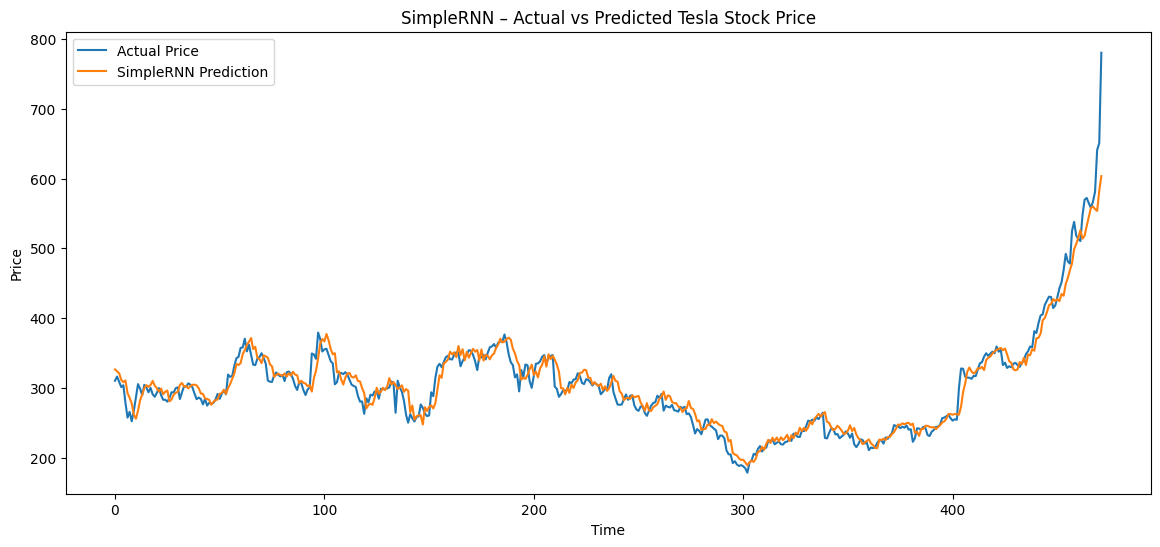

In [26]:
plt.figure(figsize=(14,6))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(rnn_pred_inv, label='SimpleRNN Prediction')
plt.title("SimpleRNN – Actual vs Predicted Tesla Stock Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

#### ***2. LSTM Model***

In [27]:
lstm_model = Sequential([
    LSTM(50, activation = 'tanh', input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Dense(1)
])

C:\Users\manav\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
lstm_model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss= 'mean_squared_error'
)

lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
checkpoint_lstm = ModelCheckpoint(
    'lstm_model.h5',
    monitor='val_loss',
    save_best_only=True
)

history_lstm = lstm_model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, checkpoint_lstm],
    verbose=1
)

Epoch 1/50
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0174

53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0073 - val_loss: 4.9402e-04
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.7357e-04 - val_loss: 6.0394e-04
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.8861e-04 - val_loss: 0.0012
Epoch 4/50
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.8767e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.9200e-04 - val_loss: 4.5884e-04
Epoch 5/50
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.2836e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.4095e-04 - val_loss: 4.5104e-04


In [30]:
lstm_pred = lstm_model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [31]:
lstm_pred_inv = scaler.inverse_transform(lstm_pred)

In [32]:
lstm_mse = mean_squared_error(y_test_inv, lstm_pred_inv)

print("LSTM MSE: ",lstm_mse)

LSTM MSE:  856.1575654309936


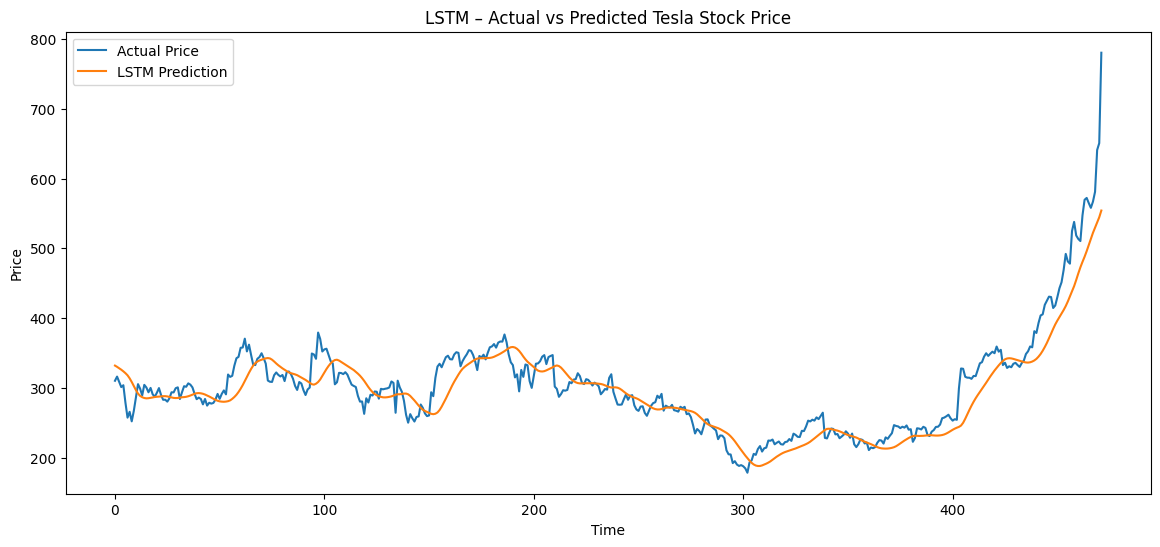

In [33]:
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label = "Actual Price")
plt.plot(lstm_pred_inv, label = "LSTM Prediction")
plt.title("LSTM – Actual vs Predicted Tesla Stock Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

### ***Insights***

In this project, two deep learning models— SimpleRNN and LSTM —were developed to predict Tesla’s adjusted closing stock price using historical time-series data. Both models were trained on the same preprocessed dataset and evaluated using Mean Squared Error (MSE) and visual inspection of actual versus predicted prices.

Contrary to common expectations, the SimpleRNN model outperformed the LSTM model on the test dataset. The SimpleRNN achieved a lower MSE value of 317.93, whereas the LSTM model recorded a higher MSE of  856.15. This indicates that, for the given data configuration and forecasting horizon, the SimpleRNN provided more accurate numerical predictions.

From the visualizations, the SimpleRNN predictions closely follow the actual stock price movements and respond more sharply to short-term fluctuations. In contrast, the LSTM model produces noticeably smoother predictions, which causes it to lag behind rapid price changes, particularly during periods of strong upward momentum. This smoothing effect, while useful for capturing long-term trends, leads to higher prediction errors when evaluated on a point-by-point basis.

### ***Conclusion***

This project explored the use of deep learning models for predicting Tesla’s stock prices using historical time-series data. SimpleRNN and LSTM architectures were implemented and evaluated to understand their effectiveness in modeling sequential financial data. After preprocessing the data and training both models, performance was assessed using Mean Squared Error and visual analysis of predicted versus actual prices.

The results showed that the SimpleRNN model performed better than the LSTM model in this specific setup, demonstrating that increased model complexity does not always guarantee improved performance. This highlights the importance of data characteristics, model tuning, and empirical evaluation when working with time-series forecasting problems.

To enhance practical usability, the trained model was deployed as an interactive Streamlit web application, allowing users to upload the last 60 days of Tesla’s adjusted closing prices and obtain a next-day price prediction. This deployment effectively bridges the gap between model development and real-world application.

Overall, the project provides a complete end-to-end workflow for financial time-series prediction while also acknowledging the inherent uncertainty of stock markets. The solution serves as a strong foundation that can be extended with additional features, external data sources, and more advanced models in future work.